<a href="https://colab.research.google.com/github/Manass20/Netflix-Clustering-Capstone-Project/blob/main/Netflix_Clustering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **In this project, you are required to do**

1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features

# **Attribute Information**

1. **show_id** : Unique ID for every Movie / Tv Show

2. **type** : Identifier - A Movie or TV Show

3. **title** : Title of the Movie / Tv Show

4. **director** : Director of the Movie

5. **cast** : Actors involved in the movie / show

6. **country** : Country where the movie / show was produced

7. **date_added** : Date it was added on Netflix

8. **release_year** : Actual Releaseyear of the movie / show

9. **rating** : TV Rating of the movie / show

10. **duration** : Total Duration - in minutes or number of seasons

11. **listed_in** : Genere

12. **description**: The Summary description

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/PROJECTS/Unsupervised(Netflix Clustering)/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [6]:
df.shape

(7787, 12)

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


No duplicate values are left

In [10]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### **General data visualisation**

In [12]:
%matplotlib inline 

In [14]:
from collections import Counter

#Define displayed years:
years = list(range(2008,2020,1))

#separate movies and tv_shows:
movie_rows = df.loc[df["type"] == "Movie"]
tv_rows = df.loc[df["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]



In [15]:
# Calculate percentages of movies and tv shows:
movies_per = round(movie_rows.shape[0] / df["type"].shape[0] * 100, 2)
tvshows_per = round(tv_rows.shape[0] / df["type"].shape[0] * 100, 2)

#Top Movie and TV Show producer country:
top5_producer_countrys = df.country.value_counts().sort_values(ascending=False).head(5)

#Top most commen Actors an directors (Movies and tv shows):
casts = ", ".join(df.copy().fillna("")['cast']).split(", ")
counter_list = Counter(casts).most_common(5)
most_commen_actors = [i for i in counter_list if i[0] != ""]
labels = [i[0] for i in most_commen_actors][::-1]
values = [i[1] for i in most_commen_actors][::-1]
most_commen_directors = df.director.value_counts().head(5).sort_values(ascending=True)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
width = 0.75

sns.set(style="whitegrid", palette="muted", color_codes=True)

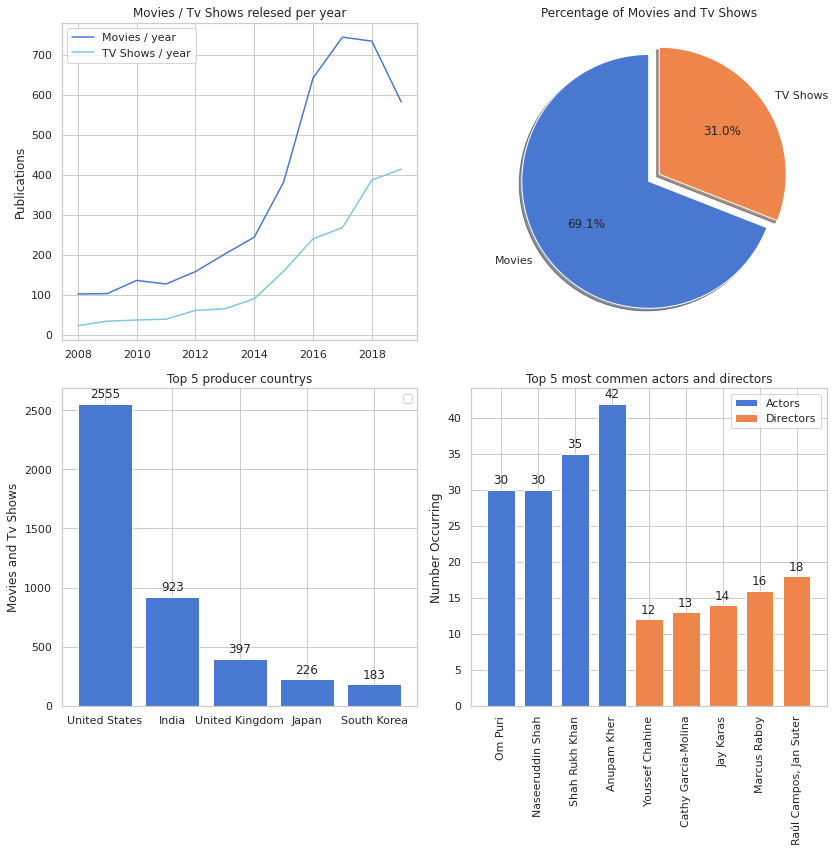

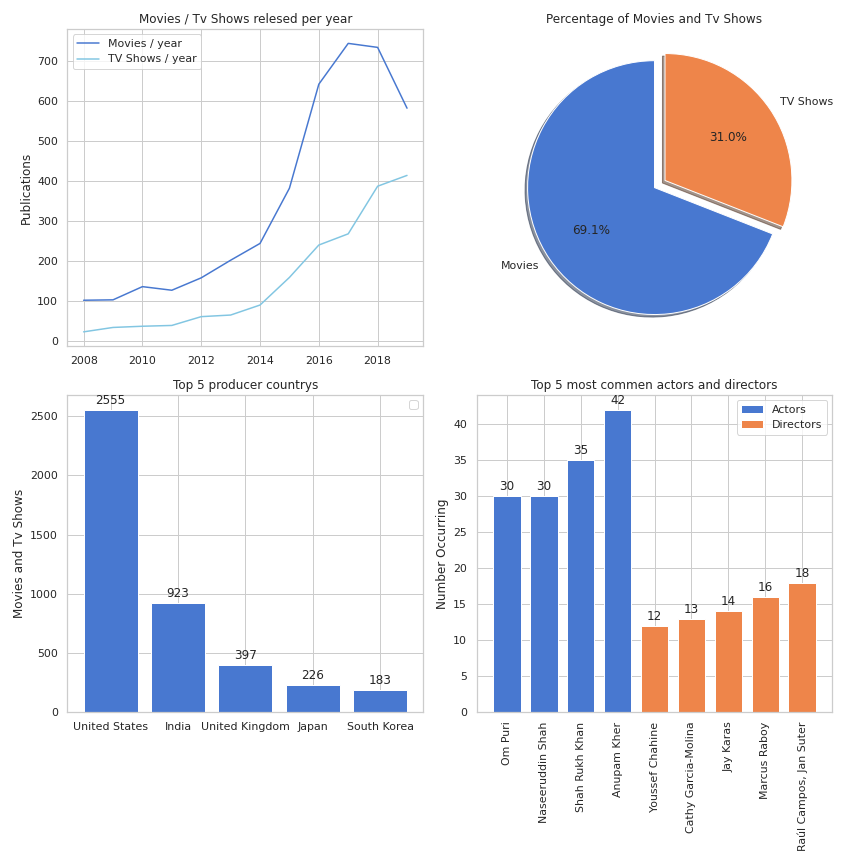

In [17]:
def autolabel(rects, axes):
    """Helper function to attach a text label above each bar in *rects*, displaying its height.
        Add specific axes[x, y] for subplot labeling"""
    for rect in rects:
        height = rect.get_height()
        axes.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False)

#Line plot of Movies and TV Shows released by Netflix per year")
sns.lineplot(data=movies, color="b", ax=axes[0, 0], label="Movies / year")
sns.lineplot(data=tv_shows, color="c", ax=axes[0, 0], label="TV Shows / year")

# Pie chart of type percentages
axes[0, 1].pie([movies_per, tvshows_per], explode=(0, 0.1,), labels=["Movies", "TV Shows"], autopct='%1.1f%%',
        shadow=True, startangle=90)

# Bar chart of top 5 Movie / Tv shows producer countrys:
rects1 = axes[1, 0].bar(top5_producer_countrys.index, top5_producer_countrys.values,)

autolabel(rects1, axes[1, 0])

#Bar chart of top 5 most commen actors and directors:
rects2 = axes[1, 1].bar(labels, values, width, label='Actors',)
rects3 = axes[1, 1].bar(most_commen_directors.index, most_commen_directors.values, width, label='Directors')

autolabel(rects2, axes[1, 1])
autolabel(rects3, axes[1, 1])

axes[0, 0].set_ylabel('Publications')
axes[0, 0].set_title('Movies / Tv Shows relesed per year')

axes[0, 1].set_title('Percentage of Movies and Tv Shows')

axes[1, 0].set_ylabel('Movies and Tv Shows')
axes[1, 0].set_title('Top 5 producer countrys')
axes[1, 0].legend()

axes[1, 1].set_ylabel('Number Occurring')
axes[1, 1].set_xticklabels(labels + list(most_commen_directors.index), rotation="vertical")
axes[1, 1].set_title('Top 5 most commen actors and directors')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('output.png')
plt.show()

from IPython.display import Image
Image(filename='output.png')